# What I'm trying to do there
1. Get needed data from this dataset https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
2. Choose only Canadian transport data
3. Make all dataframes consistent with their columns so I can easily union them
4. Union all data for visualisation in Tableau

<a class="anchor" id="toc"></a>
# TOC
* [Installing needed library](#install)
* [Airports](#airports)
* [Seaports](#seaports)
* [Roads](#roads)
* [Railroads](#railroads)
* [Union all dataframes](#union)

<a class="anchor" id="install"></a>
# Installing needed library
[To TOC](#toc)

Documentation: https://geopandas.org/en/stable/docs/reference.html

In [1]:
!pip install geopandas

You should consider upgrading via the 'C:\Users\pahan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


<span style="color:red">Attention!</span>
You'll need not only .shp files but also all files which come with it (they'll have the same name but they'll be in different format (.cpg, .dbf, .prg, .shx)). You have to upload them to Jupyter too.

<a class="anchor" id="airports"></a>
# Airports
[To TOC](#toc)

In [36]:
import geopandas as gpd

airports = gpd.read_file('ne_10m_airports.shp')

airports['gps_code'].fillna('NaN', inplace=True)
airports = airports[airports['gps_code'].str.contains('CY')] # all GPS codes of Canadian airports start with CY
airports = airports[['type', 'name', 'abbrev', 'location', 'wikipedia', 'natlscale', 'scalerank', 'geometry']]

airports['country'] = 'Canada'
airports['transport_type'] = 'Air'
airports['road_class'] = None
airports = airports.rename(columns={'wikipedia': 'website', 'natlscale': 'natrlscale'})

airports = airports[
    ['country',
     'transport_type',
     'geometry',
     'name',
     'type',
     'scalerank',
     'natrlscale',
     'abbrev',
     'website',
     'road_class'
    ]]
airports

,country,transport_type,geometry,name,type,scalerank,natrlscale,abbrev,website,road_class
44,Canada,Air,POINT (-74.02874 45.68323),Mirabel Int'l,mid,8,10.0,YMX,http://en.wikipedia.org/wiki/Montr%C3%A9al-Mir...,None
207,Canada,Air,POINT (-99.94590 49.90473),Brandon,mid,8,10.0,YBR,http://en.wikipedia.org/wiki/Brandon_Airport,None
208,Canada,Air,POINT (-113.47884 53.67492),CFB Edmonton,military major,8,10.0,YED,http://en.wikipedia.org/wiki/CFB_Edmonton,None
209,Canada,Air,POINT (-68.53673 63.75115),Iqaluit,mid,8,10.0,YFB,http://en.wikipedia.org/wiki/Iqaluit_Airport,None
210,Canada,Air,POINT (-79.92642 43.16336),John C. Munro Hamilton Int'l,mid,8,10.0,YHM,http://en.wikipedia.org/wiki/John_C._Munro_Ham...,None
211,Canada,Air,POINT (-111.22384 56.65632),Fort McMurray,mid,8,10.0,YMM,http://en.wikipedia.org/wiki/Fort_McMurray_Air...,None
213,Canada,Air,POINT (-117.44366 56.23192),Peace River,mid,8,10.0,YPE,http://en.wikipedia.org/wiki/Peace_River_Airport,None
214,Canada,Air,POINT (-64.68867 46.11621),Greater Moncton Int'l,mid,8,10.0,YQM,http://en.wikipedia.org/wiki/Greater_Moncton_I...,None
215,Canada,Air,POINT (-60.04694 46.16734),Sydney/J.A. Douglas McCurdy,mid,8,10.0,YQY,http://en.wikipedia.org/wiki/Sydney_Airport_(N...,None
216,Canada,Air,POINT (-94.97080 74.71819),Resolute Bay,mid,8,10.0,YRB,http://en.wikipedia.org/wiki/Resolute_Bay_Airport,None


<a class="anchor" id="seaports"></a>
# Seaports
[To TOC](#toc)

In [75]:
ports = gpd.read_file('ne_10m_ports.shp')

# List of ports from http://www.worldportsource.com/ports/index/CAN.php
ports_list = ["Fraser River","Fraser River Port","Halifax","Port of Halifax","Montreal","Port of Montreal","Port Cartier","Port of Port Cartier","Prince Rupert","Prince Rupert Port","Quebec","Port of Quebec","Sydney","Port of Sydney","Toronto","Port of Toronto","Vancouver","Port Metro Vancouver","A","Alliford Bay","Alliford Bay","Amherst Island","Port of Havre Aubert","Amherstburg","Port of Amherstburg","Annapolis Royal","Port of Annapolis Royal","Argentia","Port of Argentia","Arichat","Port of Arichat","Arnold's Cove","Arnold's Cove Harbour","Top  ","B","Baddeck","Port of Baddeck","Baie Verte","Port of Baie Verte","Baie-Comeau","Port of Baie-Comeau","Bamberton","Port of Bamberton","Bathurst","Port of Bathurst","Bay Bulls","Bay Bulls Harbour","Bay Roberts","Bay Roberts Harbor","Bayside","Bayside Harbour","Beaver Harbour","Beaver Harbour","Beaver Harbour","Beaver Harbour","Becancour","Port of Becancour","Bella Coola","Bella Coola Harbour","Belledune","Port of Belledune","Blacks Harbor","Blacks Harbor","Blanc-Sablon","Port of Blanc-Sablon","Bloedel","Bloedel Harbor","Blubber Bay","Blubber Bay Harbor","Botwood","Botwood Harbor","Bridgewater","Port of Bridgewater","Brigus","Brigus Bay Harbor","Brockville","Brockville Harbour","Bronte","Bronte Harbor","Buctouche","Buctouche Harbour","Burgeo","Burgeo Harbor","Top  ","C","Campbell River","Campbell River Harbor","Campbellton","Port of Campbellton","Canso","Canso Harbour","Cap-aux-Meules","Port of Cap-aux-Meules","Caraquet","Port of Caraquet","Carbonear","Port of Carbonear","Cardinal","Port of Cardinal","Carleton","Carleton Harbor","Carmanville","Carmanville Harbour","Catalina","Catalina Harbour","Chandler","Chandler Harbor","Charlottetown","Charlottetown Harbour","Chatham","Chatham Harbor","Chemainus","Port of Chemainus","Chester","Chester Harbor","Chicoutimi","Port of Chicoutimi","Churchill","Port of Churchill","Clarenville","Clarenville Harbor","Clarkson","Port of Clarkson","Coal Harbor","Coal Harbor","Collingwood","Port of Collingwood","Come By Chance","Port of Come By Chance","Comox","Comox Harbor","Contrecoeur","Contrecoeur Harbor","Corner Brook","Port of Corner Brook","Cornwall","Port of Cornwall","Cortes Bay","Cortes Bay Harbor","Country Harbour","Country Harbour","Cowichan Bay","Port of Cowichan Bay","Crofton","Port of Crofton","Top  ","D","Dalhousie","Port of Dalhousie","Delta","Westshore Terminals","Digby","Port of Digby","Dixon Entrance","Port of Dixon Entrance","Duncan Bay","Duncan Bay Harbor","Top  ","E","Esquimalt","Esquimalt Harbor","Top  ","F","Fairview Cove","Fairview Cove Terminal","Forestville","Forestville Harbor","Fraser River","Fraser River Port","Fulford Harbour","Fulford Harbour","Top  ","G","Ganges","Ganges Harbor","Gaspe","Port of Gaspe","Georgetown","Georgetown Harbor","Godbout","Port of Godbout","Goderich","Port of Goderich","Gold River","Port of Gold River","Goose Bay","Goose Bay Harbor","Grand Bank","Grand Bank Harbour","Gros Cacouna","Gros Cacouna Harbor","Top  ","H","Halifax","Port of Halifax","Hamilton","Hamilton Port","Hantsport","Hantsport Harbor","Harbour Breton","Harbour Breton","Harbour Grace","Port of Harbour Grace","Harmac","Harmac Harbor","Havre St Pierre","Port of Havre St Pierre","Heron Bay","Heron Bay","Holyrood","Holyrood Harbor","Top  ","I","Iona","Iona Harbour","Iqaluit","Iqaluit Harbor","Isaac's Harbour","Isaac's Harbour","Top  ","K","Kelsey Bay","Kelsey Bay Harbor","Kingston","Kingston Harbor","Kingsville","Port of Kingsville","Kitimat","Port of Kitimat","Kuper Island","Telegraph Harbour","Top  ","L","La Baie","La Baie Harbor","La Have","La Have Harbor","Ladysmith","Ladysmith Harbor","Les Escoumins","Les Escoumins Harbor","Les Mechins","Les Mechins Harbor","Letang","Letang Harbor","Lewisporte","Port of Lewisporte","Liscomb","Liscomb Harbor","Little Narrows","Little Narrows Harbor","Liverpool","Port of Liverpool","Lockeport","Lockeport Harbour","Long Harbour","Long Harbour","Long Pond","Long Pond Harbor","Louisbourg","Louisbourg Harbor","Lund","Lund Harbor","Lunenburg","Lunenburg Harbor","Lyall Harbour","Lyall Harbour","Top  ","M","Mahone Bay","Mahone Bay Harbor","Main Brook","Main Brook Harbor","Marathon","Port of Marathon","Marie Joseph","Marie Joseph Harbor","Marystown","Marystown Harbor","Marysville","Marysville Harbor","Masset","Masset Harbor","Matane","Matane Harbor","Mayne","Mayne Harbor","Meteghan","Meteghan Harbor","Michipicoten","Michipicoten Harbour","Midland","Port of Midland","Mont Louis","Mont Louis Harbor","Montague","Montague Harbor","Montreal","Port of Montreal","Mulgrave","Port of Mulgrave","Top  ","N","Nanaimo","Port of Nanaimo","Nanisivik","Nanisivik Harbor","Natashquan","Natashquan Harbor","New Glasgow","New Glasgow and Trenton Harbor","New Richmond","New Richmond Harbor","Newcastle","Newcastle Harbor","North Sydney","North Sydney Harbor","Top  ","O","Oakville","Oakville Harbor","Ocean Falls","Ocean Falls Harbour","Oshawa","Port of Oshawa","Owen Sound","Owen Sound Harbor","Top  ","P","Parrsboro","Parrsboro Harbour","Parry Sound","Parry Sound Harbour","Paspebiac","Paspebiac Harbor","Penetanguishene","Port of Penetanguishene","Pictou","Port of Pictou","Placentia","Placentia Harbor","Pointe-au-Pic","Pointe-au-Pic Harbor","Port Alberni","Port of Port Alberni","Port Alice","Port of Port Alice","Port Aux Basques","Port Aux Basques Harbour","Port Cartier","Port of Port Cartier","Port Clements","Port Clements","Port Colborne","Port Colborne","Port Credit","Port Credit","Port Dalhousie","Port Dalhousie","Port Hardy","Port of Port Hardy","Port Harvey","Port Harvey","Port Hastings","Port Hastings","Port Hawkesbury","Port of Port Hawkesbury","Port Hope","Port Hope Harbour","Port Medway","Port Medway","Port Mellon","Port of Port of Mellon","Port Neville","Port Neville Harbor","Port Stanley","Port Stanley","Port Weller","Port Weller","Portneuf","Portneuf Harbor","Powell River","Port of Powell River","Prescott","Port of Prescott","Prince Rupert","Prince Rupert Port","Pugwash","Port of Pugwash","Top  ","Q","Quathiaski Cove","Quathiaski Cove Harbor","Quatsino Sound","Quatsino Sound Harbor","Quebec","Port of Quebec","Queen Charlotte","Queen Charlotte Harbor","Top  ","R","Richibucto","Port of Richibucto","Richmond","Port North Fraser","Rimouski","Rimouski Harbor","Riviere du Loup","Riviere du Loup Harbor","Top  ","S","Saguenay","Port of Saguenay","Saint John","Canaport","Saint John","Saint John Port","Sainte-Anne-des-Monts","Sainte-Anne-des-Monts Harbor","Sambro","Sambro Harbor","Sandspit","Sandspit Landing","Sarnia","Port of Sarnia","Saulte Ste Marie","Saulte Ste Marie Harbor","Sept-Iles","Port of Sept-Iles","Shediac","Port of Shediac","Sheet Harbour","Sheet Harbour","Shelburne","Port of Shelburne","Sheshatshiu","Sheshatshiu Harbor","Ship Harbour","Ship Harbour","Shippegan","Shippegan Harbor","Sidney","Sidney Harbour","Skidegate","Skidegate Landing","Sonora","Sonora Harbor","Sorel","Port of Sorel","Souris","Souris Harbor","Spragge","Spragge Harbor","Springdale","Port of Springdale","Squamish","Port of Squamish","St Lawrence Seaway","St Lawrence Seaway","St. Andrews","Port of St. Andrews","St. Anthony","St. Anthony Harbor","St. Catharines","Port of St. Catharines","St. John's","Port of St. John's","St. Romuald","St. Romuald Harbor","Stephenville","Port of Stephenville","Stewart","Port of Stewart","Stormont","Stormont Harbor","Sturdies Bay","Sturdies Bay Harbor","Summerside","Summerside Harbor","Sydney","Port of Sydney","Top  ","T","Tadoussac","Tadoussac Harbor","Tahsis","Port of Tahsis","Tangier","Tangier Harbor","Terrington Basin","Terrington Basin Harbor","Thorold","Port of Thorold","Thunder Bay","Thunder Bay Port Authority","Toronto","Port of Toronto","Trois Rivieres","Port of Trois-Rivieres","Tuktoyaktuk","Tuktoyaktuk Harbor","Twillingate","Twillingate Harbour","Top  ","V","Valleyfield","Port of Valleyfield","Vancouver","Port Metro Vancouver","Victoria","Port of Victoria","Top  ","W","Wabana","Wabana Harbor","Walton","Walton Harbor","Welland","Port of Welland","Weymouth","Weymouth Harbor","Whiterock Passage","Burdwood Bay","Whycocomagh","Whycocomagh Harbor","Wiarton","Wiarton Harbor","Windsor","Port Windsor","Windsor","Windsor Harbor","Woodfibre","Woodfibre harbor"]
# Some ports have similar names with ports in other countries, so we exclude them
wrong_websites_list = [
    'www.portjam.com',
    'www.ci.richmond.ca.us/index.asp?NID=102',
    'www.gnsc.com',
    'www.merseydocks.co.uk',
    'www.sydneyports.com.au',
    'www.newportcorp.com.au',
    'www.portvanusa.com'
]

ports = ports[ports['name'].isin(ports_list)]
ports = ports[~ports['website'].isin(wrong_websites_list)]

# We exclude particular ports by their characteristics
ports = ports[~((ports['name'] == 'Tangier') & (ports['natlscale'] == 10.0))]
ports = ports[~((ports['name'] == 'Hamilton') & (ports['natlscale'] == 30.0))]

ports = ports[['name', 'website', 'natlscale', 'scalerank', 'geometry']]
ports = ports.rename(columns={'natlscale': 'natrlscale'})
ports['country'] = 'Canada'
ports['transport_type'] = 'Sea'
ports['type'] = 'port'
ports['abbrev'] = None
ports['road_class'] = None

ports = ports[
    ['country',
     'transport_type',
     'geometry',
     'name',
     'type',
     'scalerank',
     'natrlscale',
     'abbrev',
     'website',
     'road_class'
    ]]
ports

,country,transport_type,geometry,name,type,scalerank,natrlscale,abbrev,website,road_class
19,Canada,Sea,POINT (-65.46773 47.03444),Chatham,port,8,5.0,None,NaN,None
20,Canada,Sea,POINT (-53.95689 48.16333),Clarenville,port,8,5.0,None,NaN,None
21,Canada,Sea,POINT (-124.92444 49.67083),Comox,port,8,5.0,None,NaN,None
22,Canada,Sea,POINT (-123.43439 48.43639),Esquimalt,port,8,5.0,None,NaN,None
23,Canada,Sea,POINT (-55.75106 47.10028),Grand Bank,port,8,5.0,None,NaN,None
24,Canada,Sea,POINT (-60.23934 46.20889),North Sydney,port,8,5.0,None,NaN,None
25,Canada,Sea,POINT (-64.92462 47.79639),Caraquet,port,8,5.0,None,NaN,None
26,Canada,Sea,POINT (-71.05265 48.43000),Chicoutimi,port,8,5.0,None,NaN,None
27,Canada,Sea,POINT (-57.93634 48.96056),Corner Brook,port,8,5.0,None,www.cornerbrookport.com,None
28,Canada,Sea,POINT (-65.75230 44.62528),Digby,port,8,5.0,None,www.portofdigby.ns.ca,None


<AxesSubplot:>

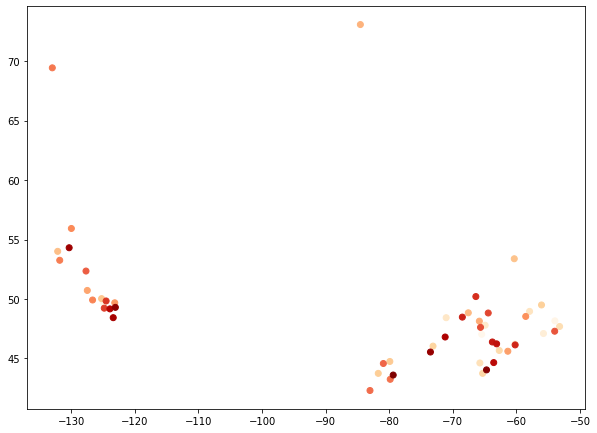

In [76]:
# Check if all ports are in Canada
ports.plot(cmap='OrRd', figsize=(10, 10))

<a class="anchor" id="roads"></a>
# Roads
[To TOC](#toc)

In [38]:
roads = gpd.read_file('ne_10m_roads_north_america.shp')

roads = roads[roads['country'] == 'Canada']
roads = roads[['number', 'class', 'type', 'scalerank', 'length', 'geometry']]

roads['country'] = 'Canada'
roads['transport_type'] = 'Road'
roads['abbrev'] = None
roads['website'] = None
roads = roads.rename(columns={'number': 'name', 'class': 'road_class', 'length':'natrlscale'})

roads = roads[
    ['country',
     'transport_type',
     'geometry',
     'name',
     'type',
     'scalerank',
     'natrlscale',
     'abbrev',
     'website',
     'road_class'
    ]]
roads

,country,transport_type,geometry,name,type,scalerank,natrlscale,abbrev,website,road_class
887,Canada,Road,"LINESTRING (-110.34285 49.78668, -110.32060 49...",NaN,Unpaved,11,38.2832,None,None,Other
888,Canada,Road,"LINESTRING (-110.41935 49.62977, -110.41538 49...",NaN,Unpaved,12,19.3048,None,None,Other
889,Canada,Road,"LINESTRING (-110.25338 49.63361, -110.21182 49...",NaN,Unpaved,12,18.6192,None,None,Other
890,Canada,Road,"LINESTRING (-111.80054 49.49433, -111.80049 49...",NaN,Unpaved,11,59.4559,None,None,Other
891,Canada,Road,"LINESTRING (-110.26135 49.58323, -110.26987 49...",NaN,Unpaved,11,68.6202,None,None,Other
...,...,...,...,...,...,...,...,...,...,...
49168,Canada,Road,"LINESTRING (-84.78182 47.97400, -84.78321 47.9...",17,Primary,4,902.2880,None,None,Federal
49169,Canada,Road,"LINESTRING (-81.12392 46.42925, -81.12206 46.4...",17,Primary,4,629.4470,None,None,Federal
49172,Canada,Road,"LINESTRING (-79.35008 43.65063, -79.36143 43.6...",QEW,Freeway,4,214.9530,None,None,State
49177,Canada,Road,"LINESTRING (-63.54394 45.42200, -63.54329 45.4...",104,Freeway,3,116.7490,None,None,Federal


<a class="anchor" id="railroads"></a>
# Railroads
[To TOC](#toc)

In [39]:
railroads = gpd.read_file('ne_10m_railroads_north_america.shp')

railroads = railroads[railroads['sov_a3'] == 'CAN']
railroads = railroads[['scalerank', 'natrlscale', 'geometry']]

railroads['country'] = 'Canada'
railroads['transport_type'] = 'Railroad'
railroads['type'] = 'railroad'
railroads['abbrev'] = None
railroads['name'] = None
railroads['website'] = None
railroads['road_class'] = None

railroads = railroads[
    ['country',
     'transport_type',
     'geometry',
     'name',
     'type',
     'scalerank',
     'natrlscale',
     'abbrev',
     'website',
     'road_class'
    ]]
railroads

,country,transport_type,geometry,name,type,scalerank,natrlscale,abbrev,website,road_class
827,Canada,Railroad,"LINESTRING (-135.10198 60.70515, -135.07158 60...",None,railroad,8,0,None,None,None
828,Canada,Railroad,"LINESTRING (-118.88671 55.80585, -118.87792 55...",None,railroad,8,0,None,None,None
829,Canada,Railroad,"LINESTRING (-115.92144 60.82545, -115.93419 60...",None,railroad,8,0,None,None,None
830,Canada,Railroad,"LINESTRING (-118.78020 55.76667, -118.77581 55...",None,railroad,8,0,None,None,None
831,Canada,Railroad,"LINESTRING (-121.07354 55.13764, -121.10210 55...",None,railroad,9,5,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1082,Canada,Railroad,"LINESTRING (-93.44396 48.62598, -93.41735 48.6...",None,railroad,8,0,None,None,None
1083,Canada,Railroad,"LINESTRING (-79.47442 43.67975, -79.47265 43.6...",None,railroad,8,0,None,None,None
1093,Canada,Railroad,"LINESTRING (-122.51296 54.75516, -122.51848 54...",None,railroad,8,0,None,None,None
1099,Canada,Railroad,"LINESTRING (-106.35690 53.21898, -106.36150 53...",None,railroad,8,0,None,None,None


<a class="anchor" id="union"></a>
# Union all dataframes
[To TOC](#toc)

We can't store linear and point geometry in one column, so there would be two dataframes

In [77]:
# Concatenate two GeoDataFrames
canada_point = airports.append(ports)
canada_point = canada_point.rename(columns={'transport_type': 'transport'})

canada_point.to_file('canada_point.shp')

In [56]:
canada_line = roads.append(railroads)
canada_line = canada_line.rename(columns={'transport_type': 'transport'})
canada_line

canada_line.to_file('canada_line.shp')

# Reference

In [ ]:
# Drop columns from GeoDataFrame
gdf = gdf.drop(columns=['column1', 'column2'])

# Filter GeoDataFrame on a condition
new_gdf = gdf[gdf['column'] > 10]

# Add a new column to the shapefile
data['new_column'] = 'example'

# Concatenate two GeoDataFrames
gdf = gpd.GeoDataFrame(pd.concat([gdf1, gdf2], ignore_index=True), crs=gdf1.crs)

# Export the modified shapefile to a new file
data.to_file('modified_shapefile.shp')